In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
file= 'DATOS.csv'
data= pd.read_csv(file, header=None)
data

,0,1
0,1970,56500.0000
1,1971,49600.0000
2,1972,64800.0000
3,1973,91200.0000
4,1974,101600.0000
5,1975,112100.0000
6,1976,115300.0000
7,1977,111900.0000
8,1978,115200.0000
9,1979,129300.0000


In [6]:
import numpy as np
import scipy.optimize as opt


In [13]:
x = data.iloc[:,0].values/(1e4)
y = data.iloc[:,1].values/(1e6)


In [14]:
def fun_obj(b, x, y, n):
    return np.sum((y-b.dot([x**i for i in range(n+1)]))**2)

In [15]:
b01 = np.zeros(2)
ajuste1 = opt.minimize(fun_obj, b01, args=(x,y,1))
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x,y,2))
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x,y,3))

In [16]:
ajuste1

      fun: 0.07293848748978365
 hess_inv: array([[  244.8493515, -1228.8004112],
       [-1228.8004112,  6167.1287889]])
      jac: array([-4.65661287e-09, -9.31322575e-10])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 4
     njev: 11
   status: 0
  success: True
        x: array([-15.41164946,  78.51788672])

In [17]:
ajuste2

      fun: 0.0728967216220444
 hess_inv: array([[ 211.8639838 , -983.46874421, -400.40430173],
       [-983.46874421, 4565.51846666, 1858.56465579],
       [-400.40430173, 1858.56465579,  757.76222153]])
      jac: array([-5.12227416e-08,  5.14090061e-07, -1.29081309e-06])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 4
     njev: 11
   status: 0
  success: True
        x: array([-14.32056405,  67.56223386,  27.50036472])

In [18]:
ajuste3

      fun: 0.07288980862557365
 hess_inv: array([[ 208.50192624, -963.51659262, -392.31831163, -118.11367387],
       [-963.51659262, 4452.81920392, 1812.85206315,  545.80649053],
       [-392.31831163, 1812.85206315,  739.22075631,  222.26049213],
       [-118.11367387,  545.80649053,  222.26049213,   67.91726625]])
      jac: array([-6.33299351e-08,  5.97909093e-07, -1.25914812e-06, -8.30739737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 66
      nit: 4
     njev: 11
   status: 0
  success: True
        x: array([-14.20475888,  66.72385728,  27.16163116,   8.17680262])

In [20]:
xpoints = x*1e4
ypoints = y*1e6
yhat1 = (ajuste1.x[0]+ajuste1.x[1]*xpoints/(1e4))*1e6
yhat2 = (ajuste2.x[0]+ajuste2.x[1]*xpoints/(1e4)+
         ajuste2.x[2]*(xpoints/(1e4))**2)*1e6
yhat3 = (ajuste3.x[0]+ajuste3.x[1]*xpoints/(1e4)+
         ajuste3.x[2]*(xpoints/(1e4))**2+
         ajuste3.x[3]*(xpoints/(1e4))**3)*1e6

In [21]:
import matplotlib.pyplot as plt

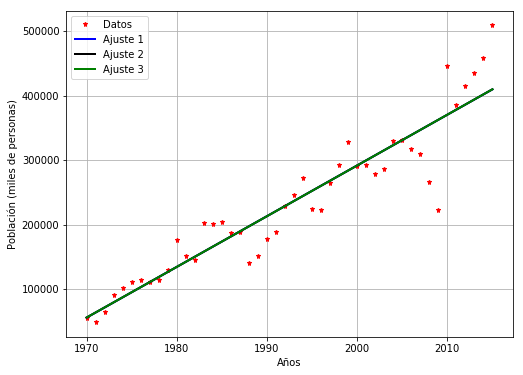

In [27]:
plt.figure(figsize=(8,6))
plt.plot(xpoints, ypoints, 'r*', ms=5, label='Datos')
plt.plot(xpoints, yhat1, 'b', lw=2, label='Ajuste 1')
plt.plot(xpoints, yhat2, 'k', lw=2, label='Ajuste 2')
plt.plot(xpoints, yhat3, 'g', lw=2, label='Ajuste 3')
plt.grid()
plt.xlabel('Años')
plt.ylabel('Población (miles de personas)')
plt.legend(loc='best')

Text(0,0.5,'error')

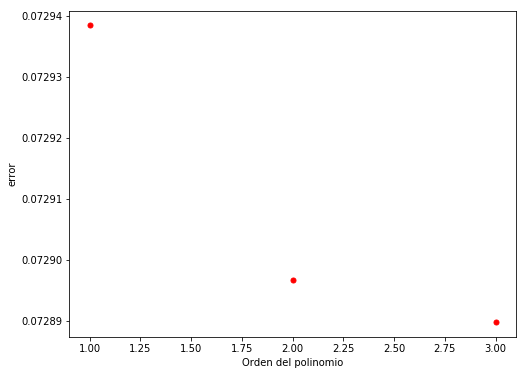

In [23]:
error = [ajuste1.fun, ajuste2.fun, ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4), error, 'ro', ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('error')